# Câncer de Mama

### Importacao de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregar a base e visualizar primeiras linhas
df1 = pd.read_csv('../BreastCancer.csv') 
# colocar id como nome de linha
df1 = df1.set_index('id')
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#dimnesões da base
df1.shape

(569, 31)

### Indicar a semente inicial e para divisão da base em treino e teste

In [4]:
import random
np.random.seed(0) #semente inicial
nlinhas = df1.shape[0]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,df1.columns != 'diagnosis'], df1['diagnosis'], test_size=0.3)

In [6]:
# alguns dados estatisticos por atributo
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.185500,19.192839,92.335503,661.859045,0.096475,0.104080,0.088794,0.049479,0.180698,0.062646,...,16.359621,25.534523,107.736030,894.246985,0.132529,0.253369,0.268531,0.115221,0.289187,0.083718
std,3.598618,4.190476,24.769334,366.558262,0.013916,0.051031,0.078154,0.039216,0.028057,0.006861,...,4.965170,6.147466,34.460647,597.853882,0.022989,0.153653,0.193250,0.065688,0.063439,0.017957
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.032500,75.310000,420.350000,0.086740,0.066805,0.030385,0.020710,0.161525,0.057685,...,13.052500,20.865000,84.122500,516.425000,0.116300,0.148600,0.119100,0.065320,0.247850,0.071462
50%,13.310000,18.725000,86.140000,548.450000,0.096035,0.094035,0.062650,0.033870,0.179150,0.061715,...,14.915000,25.155000,97.455000,682.000000,0.132250,0.216000,0.229850,0.098855,0.280950,0.080075
75%,15.772500,21.597500,104.475000,779.125000,0.105400,0.128750,0.128775,0.075022,0.195400,0.065735,...,19.005000,29.452500,125.775000,1093.250000,0.145275,0.328975,0.378750,0.161300,0.318275,0.091853
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.105000,0.290300,0.663800,0.207500


## Análise exploratória

In [7]:
NumberOfClasses = len(y_train.unique())
NumberOfClasses

2

In [8]:
# Criar encoder para classe: categórico para numérico
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
labelencoder_y = labelencoder_y.fit(y_train)

labelencoder_y.classes_

array(['B', 'M'], dtype=object)

In [9]:
#aplicar encoder no treino e no teste
y_train = labelencoder_y.transform(y_train)
y_test = labelencoder_y.transform(y_test)
print(y_train)

[0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


### Dispersão

#### Visualização Raio x Textura  e cores comos as classes de saída (Diagnóstico)

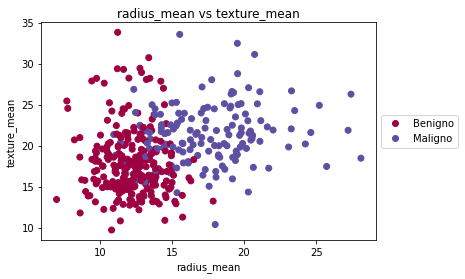

In [10]:
fig = plt.scatter(x_train['radius_mean'], x_train['texture_mean'], c=y_train, cmap=plt.cm.Spectral)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('radius_mean vs texture_mean')

#legenda de cores
handles, labels = fig.legend_elements()
plt.legend(handles, ['Benigno', 'Maligno'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Visualização Raio x Diagnóstico 

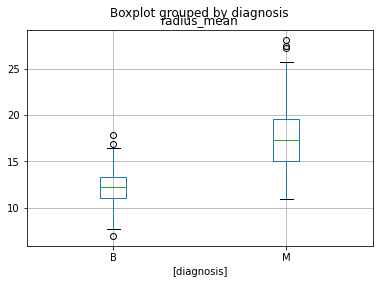

In [11]:
df1.boxplot(column=['radius_mean'], by=['diagnosis'])
plt.show()

## **Normalizando os Dados**

In [12]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized = preprocessParams.transform(x_test)

# Rede Neural

In [13]:
from keras import Model, Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [14]:
RN = Sequential()
RN.add(Dense(10,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(NumberOfClasses,activation = 'sigmoid'))
RN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________


In [15]:
# treinamento
from tensorflow.keras.utils import to_categorical
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['accuracy'])
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 100)

Epoch 1/100


2022-03-15 19:03:10.765990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


13/13 [==============================] - 1s 2ms/step - loss: 0.2591 - accuracy: 0.4372
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.7889
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.9372
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9548
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9623
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9648
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9698
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9774
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9774
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9824
Epoch 11/100
13/13 [=

13/13 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9899
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9899
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9899
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9899
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9899
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9899
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9899
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9899
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9899
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9899
Epoch 93/100


In [16]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.02087111584842205
Test accuracy: 0.9707602262496948


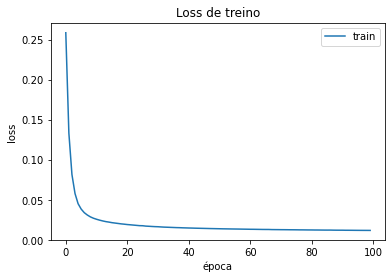

In [17]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.title('Loss de treino')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

In [18]:
# Previsão
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test


In [19]:
# Matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes)
pd.DataFrame(confMatrix, index=['Pred 0', 'Pred 1'], columns=['Real 0', 'Real1'],) #matriz de confusão

,Real 0,Real1
Pred 0,106,3
Pred 1,2,60


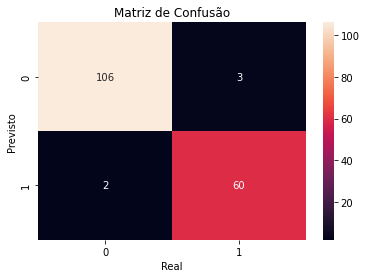

In [20]:
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['0', '1']) 
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()